<a href="https://colab.research.google.com/github/Raihan4520/Neural-Network/blob/main/NN_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Using TensorFlow**

In [ ]:
# Package imports
import time
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
# Check available GPUs
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPUs = {len(gpu_device)}")

for i, gpu in enumerate(gpu_device):
  print(f"GPU {i + 1} = {gpu}")


Number of GPUs = 0


In [ ]:
# Train using GPU
# tf.config.experimental.set_memory_growth(gpu_device[0], True)


Shape of matrix X: (200, 2)
Shape of matrix Y: (200, 1)



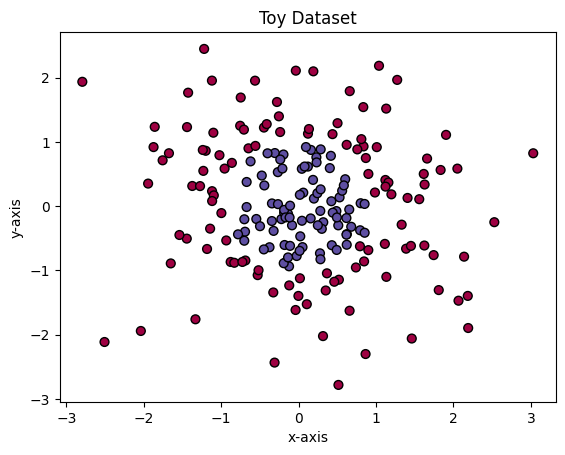

In [ ]:
# Create toy dataset
np.random.seed(1)
X = np.random.randn(200, 2)
Y = (np.linalg.norm(X, axis=1) < 1).astype(int).reshape(-1, 1)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Toy Dataset')
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral, edgecolors='k')

print("Shape of matrix X:", X.shape)
print("Shape of matrix Y:", Y.shape)
print()


In [ ]:
# Build the model

# Sequential model
model = tf.keras.Sequential([
  tf.keras.Input(shape=(2,)),                           # Input layer
  tf.keras.layers.Dense(units=20, activation='relu'),   # Hidden layer 1
  tf.keras.layers.Dense(units=10, activation='relu'),   # Hidden layer 2
  tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer
])

# # Functional model
# input_layer = tf.keras.Input(shape=[2])                                              # Input layer
# hidden_layer_1 = tf.keras.layers.Dense(units=20, activation='relu')(input_layer)     # Hidden layer 1
# hidden_layer_2 = tf.keras.layers.Dense(units=10, activation='relu')(hidden_layer_1)  # Hidden layer 2
# output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(hidden_layer_2)  # Output layer
# model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), # Gradient descent
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Custom callback to print loss after each 100 epochs
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        super(CustomCallback, self).__init__()
        self.epochs = epochs

    def on_epoch_end(self, epoch, logs=None):
        if epoch == 0 or (epoch + 1) % 100 == 0:  # Print every 100 epochs
            print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {logs["loss"]:.4f}')


In [ ]:
# Train the model
epochs = 1000

# Record start time
start_time = time.time()

my_model = model.fit(X, Y, epochs=epochs, verbose=0, callbacks=[CustomCallback(epochs)])

# Record end time
end_time = time.time()

# Calculate and print training time
training_time = end_time - start_time
print("----------------------------------")
print(f"Total training time: {training_time:.2f} seconds")
print("----------------------------------")


Epoch [1/1000], Loss: 0.7745
Epoch [100/1000], Loss: 0.0829
Epoch [200/1000], Loss: 0.0251
Epoch [300/1000], Loss: 0.0121
Epoch [400/1000], Loss: 0.0076
Epoch [500/1000], Loss: 0.0050
Epoch [600/1000], Loss: 0.0039
Epoch [700/1000], Loss: 0.0030
Epoch [800/1000], Loss: 0.0026
Epoch [900/1000], Loss: 0.0021
Epoch [1000/1000], Loss: 0.0018
----------------------------------
Total training time: 57.59 seconds
----------------------------------


Text(0.5, 1.0, 'Binary Cross-Entropy')

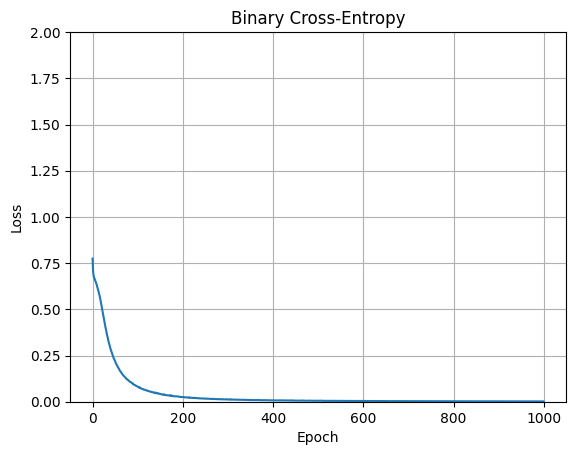

In [ ]:
# Plot binary cross-entropy
plt.plot(my_model.history['loss'])
plt.ylim(0, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Binary Cross-Entropy")


In [ ]:
# Helper function to plot a decision boundary
def plot_decision_boundary(pred_func):
  # Create a meshgrid for plotting decision boundaries
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))

  # Predict the entire grid of points
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.8, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='k')


13319/13319 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step


Text(0.5, 1.0, 'Decision Boundary')

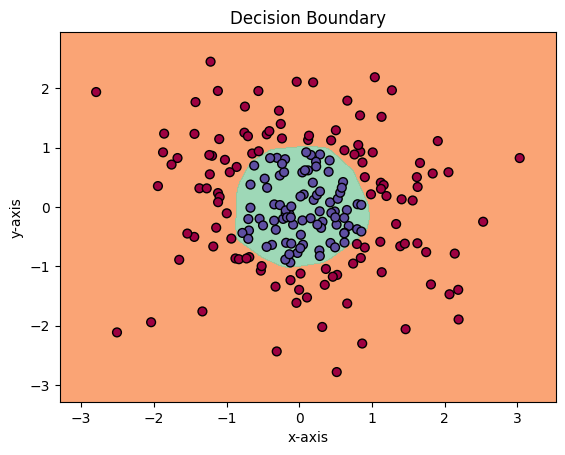

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Decision Boundary")
